In [2]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd : float
    total_usd : float
    total_inr : float


In [3]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] *1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] *85
    return state

In [5]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calculate_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

# should add edges
builder.add_edge(START, "calculate_total_node")
builder.add_edge("calculate_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

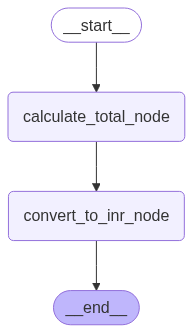

In [6]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({'amount_usd':1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}